In [183]:
# Auto PEP8 Code
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [184]:
# Enable Plots in Jupyter Notebook
%matplotlib inline

<IPython.core.display.Javascript object>

In [7]:
from skimage import feature
import cv2
import matplotlib.pyplot as plt

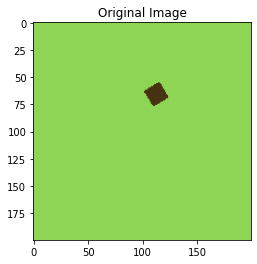

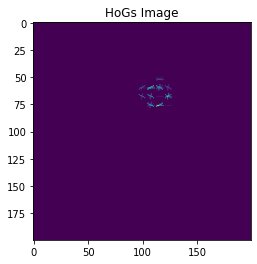

In [8]:
# Test HoG with sample image where square is oriented almost straight
# Original Image
image = cv2.imread("./dataset/squares/square-0.png")
plt.imshow(image)
plt.title("Original Image")
plt.show()

# Run HoGs on image
(hog, hog_image) = feature.hog(
    image,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    block_norm="L2",
    visualize=True,
    transform_sqrt=True,
)

plt.imshow(hog_image)
plt.title("HoGs Image")
plt.show()

In [188]:
# Complete Code
import os
import cv2

from sklearn.svm import LinearSVC
from skimage import feature
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

<IPython.core.display.Javascript object>

In [189]:
# Get HOG Features from Training Set
img_path = "shapes"
img_path = f"input/{img_path}"

x_test = []
y_test = []

# Get all the image folder paths
img_paths = os.listdir(img_path)
for path in img_paths:

    # Get lists containing names of all images for training set
    main_path = f"{img_path}/{path}"
    all_images = os.listdir(main_path)

    # Run HoGs on training set
    for image in all_images:

        # Get image
        image_path = f"{main_path}/{image}"

        # Read image and resize to 128 x 256 - HoGs requires 1:2 ratio
        image = cv2.imread(image_path)
        image = cv2.resize(image, (128, 256))

        # Calculate HOG descriptor for each image
        hog_desc = feature.hog(
            image,
            orientations=9,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            transform_sqrt=True,
            block_norm="L2",
        )

        # Add images and labels
        x_test.append(hog_desc)
        y_test.append(path)

<IPython.core.display.Javascript object>

In [190]:
# Train SVM
print("Training SVM on the training set ...")
svm_model = LinearSVC(random_state=42, tol=1e-5)
svm_model.fit(x_test, y_test)

Training SVM on the training set ...


LinearSVC(random_state=42, tol=1e-05)

<IPython.core.display.Javascript object>

In [191]:
# Run SVM model on test images
print("Testing SVM model on testing set ...")

img_path = "shapes"
img_path = f"test_images/{img_path}"
img_paths = os.listdir(img_path)

output_path = f"outputs/"

x_pred_all = []
y_pred_all = []

# loop over the test dataset folders
for (i, img) in enumerate(img_paths):
    # File pathing
    img = f"{img_path}/{img}"
    image = cv2.imread(img)

    # Resize to 128 x 256 - HoGs requires 1:2 ratio
    resized_image = cv2.resize(image, (128, 256))

    # Generate HoG for image
    (hog_desc, hog_image) = feature.hog(
        resized_image,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        transform_sqrt=True,
        block_norm="L2",
        visualize=True,
    )

    # Run SVM prediction
    x_pred = hog_desc.reshape(1, -1)
    y_pred = svm_model.predict(x_pred)[0]

    x_pred_all.append(x_pred)
    y_pred_all.append(y_pred)

    # Print predictions
    img_name = img.split("/")[-1][:-4]

    print("Actual >>>", img_name)
    print("Predicted >>>", pred)

    # Rescale HoG image
    hog_image = hog_image.astype("float64")

    # Add text to image
    actual_text = f"Actual: {img_name}"
    predicted_text = f"Predicted: {y_pred}"

    cv2.putText(
        image, predicted_text, (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2
    )
    cv2.putText(
        image, actual_text, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2
    )

    # Write output images to output folder
    cv2.imwrite(f"{output_path}hog_{i}.jpg", hog_image * 255.0)
    cv2.imwrite(f"{output_path}pred_{i}.jpg", image)

Testing SVM model on testing set ...
Actual >>> blank10
Predicted >>> squares
Actual >>> blank5
Predicted >>> squares
Actual >>> blank6
Predicted >>> squares
Actual >>> blank7
Predicted >>> squares
Actual >>> blank8
Predicted >>> squares
Actual >>> blank9
Predicted >>> squares
Actual >>> square-11
Predicted >>> squares
Actual >>> square-12
Predicted >>> squares
Actual >>> square-13
Predicted >>> squares
Actual >>> square-14
Predicted >>> squares
Actual >>> square-15
Predicted >>> squares
Actual >>> square-16
Predicted >>> squares
Actual >>> square-17
Predicted >>> squares
Actual >>> square-18
Predicted >>> squares
Actual >>> square-19
Predicted >>> squares
Actual >>> square-20
Predicted >>> squares


<IPython.core.display.Javascript object>

In [192]:
# Accuracy of Model
acc = accuracy_score(y_test[: len(y_pred_all)], y_pred_all)
print(f"Score: {acc}")

Score: 0.75


<IPython.core.display.Javascript object>

In [193]:
print(classification_report(y_test[: len(y_pred_all)], y_pred_all))

              precision    recall  f1-score   support

       blank       1.00      0.60      0.75        10
     squares       0.60      1.00      0.75         6

    accuracy                           0.75        16
   macro avg       0.80      0.80      0.75        16
weighted avg       0.85      0.75      0.75        16



<IPython.core.display.Javascript object>

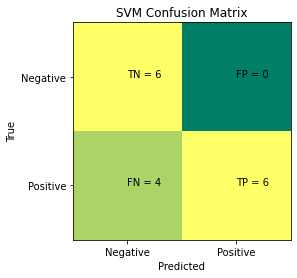

<IPython.core.display.Javascript object>

In [194]:
cm = confusion_matrix(
    y_test[: len(y_pred_all)], y_pred_all, labels=["squares", "blank"]
)

plt.clf()
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.summer)
classNames = ["Negative", "Positive"]
plt.title("SVM Confusion Matrix")
plt.ylabel("True")
plt.xlabel("Predicted")
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [["TN", "FP"], ["FN", "TP"]]

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j]) + " = " + str(cm[i][j]))
plt.show()